In [101]:
import pandas as pd
# Given potential issues seen by inspecting the data manually, a little early cleaning is needed
df = pd.read_csv("../data/2025_data_to_explore.csv", engine="python", encoding="utf-8")

def clean_text(text):
    return str(text).replace('\u2028', ' ').replace('\u2029', ' ').replace('\u0085', ' ')
df["company_description"] = df["company_description"].apply(clean_text)

if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

In [102]:
print(df.shape)
df.sample(20)

(1100, 5)


,id,company_description,source,is_edited,created_at
952,558138,"IT support and infrastructures can be complicated. Don’t worry, we are here to help. Spaghetti Networks specializes in small businesses and take the complications out of IT so you can focus on your business. We focus on getting your IT business needs running smoothly with the attention every company deserves.",LinkedIn - Reported,0.0,2023-10-31 17:35:02
753,476909,"Accelebrate is part of Axcel Learning, a leading provider of professional training. Together, the Axcel Learning companies offer a wide range of courses and certifications to help you upskill and reskill your workforce.",website,0.0,2023-10-27 14:45:36
149,370707,"Accompanied by HLD since 2021, Photonis is a high-tech company, with more than 85 years of experience in the innovation, development, manufacture and sale of technologies in the field of photo detection and imaging. Today, it offers its customers detectors and detection solutions: its power tubes, digital cameras, neutron & gamma detectors, scientific detectors and intensifier tubes allow Photonis to respond to complex issues in environments extremely demanding by offering tailor-made solutions to its customers. Thanks to its sustained and permanent investment, Photonis is internationally recognized as a major innovator in optoelectronics, with production and R&D carried out on 6 sites, in Europe and the USA and over 1 100 employees.",LinkedIn - Reported,0.0,2023-08-05 12:47:54
154,374169,"erwin is a leader in enterprise modeling and data intelligence software. The erwin EDGE platform creates an enterprise data governance experience for IT and business collaboration, driving meaningful insights, agile innovation, risk management and business transformation. Integrated data modeling, data governance, enterprise architecture and business process modeling capabilities help guide smart decisions. With erwin by Quest, organizations of all types across the globe can maximize the security, quality and value of their assets to control data chaos and prepare for the next IT challenge.",LinkedIn - Reported,0.0,2023-08-05 16:17:31
69,232305,"Leading IT, HR, Marketing, Finance & Executive Recruitment Agency. Fees from 12.5% & 100% rebate protection.",website,0.0,2023-07-06 11:01:43
535,556978,"Harding Pediatrics is a private pediatric medical practice. The company is located at 45 Oak Ave, Worcester, Massachusetts, United States.",LinkedIn - Reported,0.0,2023-10-31 16:43:19
910,555368,"Greenbrier Technologies & Electric is a full service technology solutions provider specializing in Managed IT Services, Backup & Disaster Recovery, Network Security, Smart Home Automation and Control Systems, Cloud Solutions, Electrical, Communications, & Surveillance.",LinkedIn - Reported,0.0,2023-10-31 15:36:39
96,920422,"ZOE helps you improve your health with at-home tests, personalized food scores, and expert nutrition advice. Thrive with ZOE’s science-backed program!",website,0.0,2025-02-07 06:59:45
681,508473,P&M furniture ist einer der führenden Großhändler für hochwertige Gastronomiemöbel und Gastronomieeinrichtungen.,website,0.0,2023-10-30 01:00:37
238,686398,Serruya Private Equity Inc. is a global private equity firm focused on transforming companies by collaborating with management to develop and implement strategies which leverage SPE’s existing operational and financial resources.,LinkedIn - Reported,0.0,2024-01-15 14:15:45


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1100 non-null   object 
 1   company_description  1100 non-null   object 
 2   source               1086 non-null   object 
 3   is_edited            1085 non-null   float64
 4   created_at           1085 non-null   object 
dtypes: float64(1), object(4)
memory usage: 43.1+ KB


In [104]:
df.describe(include="all")

,id,company_description,source,is_edited,created_at
count,1100,1100,1086,1085.0,1085
unique,1096,1088,3,NaN,1082
top,mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes;,nan,website,NaN,2023-11-01 12:34:34
freq,2,13,727,NaN,2
mean,NaN,NaN,NaN,0.0,NaN
std,NaN,NaN,NaN,0.0,NaN
min,NaN,NaN,NaN,0.0,NaN
25%,NaN,NaN,NaN,0.0,NaN
50%,NaN,NaN,NaN,0.0,NaN
75%,NaN,NaN,NaN,0.0,NaN


In [105]:
print(df.duplicated().sum())
print(df.duplicated(subset=["id"]).sum())

4
4


In [106]:
df.isnull().sum()

id                      0
company_description     0
source                 14
is_edited              15
created_at             15
dtype: int64

In [107]:
print(df["company_description"].duplicated().sum())

12


In [108]:
df["source"].value_counts()

source
website                727
LinkedIn - Reported    358
2024-04-03 23:17:09      1
Name: count, dtype: int64

Some initial things that stand out:
- We have some non-english descriptions to handle
- Dates need converting
- Symbols need handling
- We have some duplicated rows/id's, but interestingly even more duplicated company descriptions - need to look into that
- Some null values to handle

In [109]:
df["is_edited"].value_counts()

is_edited
0.0    1085
Name: count, dtype: int64

In [110]:
df.loc[df["is_edited"].isnull()]

,id,company_description,source,is_edited,created_at
367,765111,"Connecting innovators with expertise and capital 0 0 1 22 127 AKQA 1 1 148 \n14.0 Normal 0 false false false EN-US JA X-NONE /* Style Definitions */ \ntable.MsoNormalTable {mso-style-name:Table Normal"";",NaN,NaN,NaN
368,mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes;,nan,NaN,NaN,NaN
369,"mso-style-priority:99; mso-style-parent:""""; mso-padding-alt:0in 5.4pt 0in",nan,NaN,NaN,NaN
370,5.4pt; mso-para-margin:0in; mso-para-margin-bottom:.0001pt;,nan,NaN,NaN,NaN
371,line-height:115%; mso-pagination:widow-orphan; font-size:11.0pt;,nan,NaN,NaN,NaN
372,font-family:Arial; color:black;} 0 0 1 24 143 AKQA 1 1 166 14.0 Normal 0,nan,NaN,NaN,NaN
373,false false false EN-US JA X-NONE /* Style Definitions */,nan,NaN,NaN,NaN
374,"table.MsoNormalTable {mso-style-name:""Table Normal"";",nan,NaN,NaN,NaN
375,mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes;,nan,NaN,NaN,NaN
376,"mso-style-priority:99; mso-style-parent:""""; mso-padding-alt:0in 5.4pt 0in",nan,NaN,NaN,NaN


In [111]:
with pd.option_context('display.max_colwidth', None, 'display.max_columns', None, 'display.width', None):
    display(df.loc[df["is_edited"].isnull()][["id"]])

,id
367,765111
368,mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes;
369,"mso-style-priority:99; mso-style-parent:""""; mso-padding-alt:0in 5.4pt 0in"
370,5.4pt; mso-para-margin:0in; mso-para-margin-bottom:.0001pt;
371,line-height:115%; mso-pagination:widow-orphan; font-size:11.0pt;
372,font-family:Arial; color:black;} 0 0 1 24 143 AKQA 1 1 166 14.0 Normal 0
373,false false false EN-US JA X-NONE /* Style Definitions */
374,"table.MsoNormalTable {mso-style-name:""Table Normal"";"
375,mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes;
376,"mso-style-priority:99; mso-style-parent:""""; mso-padding-alt:0in 5.4pt 0in"


In [112]:
df.iloc[362:367]

,id,company_description,source,is_edited,created_at
362,528048,"Attract New customers every day and sell more with THE WORLD'S MOST COMPLETE AND POWERFUL DIGITAL MARKETING PLATFORM.\ \ From a Simple Website to the Most Sophisticated Sales Funnel. Builderall's Final Result is Unbeatable! That is Why Thousands of Entrepreneurs in More Than 100 Countries Already Trust Builderall to Create, Market and Sell Online.",LinkedIn - Reported,0.0,2023-10-30 20:39:07
363,884172,Discover exciting career opportunities for experienced professionals in an innovative machine vision environment at ISRA Vision.,website,0.0,2024-12-07 23:48:23
364,711089,It supports the physiological energy metabolism with an immediate recharge of energy for debilitated dogs and / or those who practice intense physical activity.,website,0.0,2024-02-20 11:49:52
365,837868,"Since 1969, FSI has manufactured specialty appliances for the healthcare, life-science, residential, hospitality, and foodservice markets.",website,0.0,2024-10-24 11:20:43
366,399911,"Established in 1913 in London's Jermyn Street, Hawes & Curtis is a heritage British brand offering menswear and womenswear collections of high quality in affordable prices.",website,0.0,2023-09-05 21:21:45


In [113]:
df.iloc[366]["company_description"]

"Established in 1913 in London's Jermyn Street, Hawes & Curtis is a heritage British brand offering menswear and womenswear collections of high quality in affordable prices."

In [114]:
df.iloc[367]["company_description"]

'Connecting innovators with expertise and capital 0 0 1 22 127 AKQA 1 1 148 \n14.0 Normal 0 false false false EN-US JA X-NONE /* Style Definitions */ \ntable.MsoNormalTable {mso-style-name:Table Normal"; '

In [115]:
df.iloc[382:387]

,id,company_description,source,is_edited,created_at
382,858748,We're actively working reduce our carbon footprint and positively contribute to the community. Explore our sustainability efforts today.,website,0.0,2024-11-06 10:11:54
383,434076,"Front Rush provides smart, collaborative athletics management software solutions that drive data, efficiency, communication and coach productivity. Our best-in-class recruiting software supports 9,500+ college teams at over 850 schools. Front Rush is the first choice for coaches.",website,0.0,2023-10-24 17:09:12
384,121381,IMPOWER is the country’s largest independent consultancy focussed exclusively on delivering better public services.,website,0.0,2023-06-28 04:24:40
385,905033,what you canexpect from us. We are an invested partner. One that focuses solely on the needs and goals of our clients in order to craft unique marketing solutions that,website,0.0,2025-01-08 16:53:56
386,422950,"Established in 1957, NGS Printing provides high quality screenprinted and digital graphic using state-of-the-art equipment and attentive customer service.",website,0.0,2023-10-23 22:10:09


In [116]:
df.iloc[382]["company_description"]

"We're actively working reduce our carbon footprint and positively contribute to the community. Explore our sustainability efforts today."

It looks like the entry for company id 765111 was corrupted, causing it to be scattered across multiple rows instead.

Looking at entries either side of these erroneous rows implies they are unrelated, so all of this represents one entry.

With limited time/knowledge of the upstream methods, I've chosen to just manually "fix" it (without re-wording the company_description for consistency/reproducibility reasons), rather than build something more scalable and flexible. Not ideal but reasonable I think for this MVP. Also the pipeline should still grab useful signal and clean some of its issues.

In [117]:
def fix_756111_issue(df):
    # Company with id 756111 has a broken description that spans multiple rows
    # The rows with the broken description are from 367 to 381 (inclusive)
    broken_rows = df.loc[367:381].copy()
    correct_id = broken_rows.iloc[0]["id"]

    combined_desc_parts = broken_rows["company_description"].dropna().astype(str).tolist()
    combined_desc_parts += broken_rows["id"][1:].dropna().astype(str).tolist()  # skip first 'id' (which is real ID)
    combined_description = " ".join(combined_desc_parts)

    corrected_row = {
        "id": correct_id,
        "company_description": combined_description,
        "source": df["source"].mode()[0], # since no other null values, assume it did have a source value
        "is_edited": 0, # since no other null values, assume is_edited = 0
        "created_at": broken_rows.iloc[-1]["source"], # use the last source value that was in the wrong place
    }

    df_cleaned = df.drop(index=range(367, 382))
    df_cleaned = pd.concat([df_cleaned, pd.DataFrame([corrected_row])], ignore_index=True)

    return df_cleaned

In [118]:
df = fix_756111_issue(df)
df.iloc[367:382]

,id,company_description,source,is_edited,created_at
367,858748,We're actively working reduce our carbon footprint and positively contribute to the community. Explore our sustainability efforts today.,website,0.0,2024-11-06 10:11:54
368,434076,"Front Rush provides smart, collaborative athletics management software solutions that drive data, efficiency, communication and coach productivity. Our best-in-class recruiting software supports 9,500+ college teams at over 850 schools. Front Rush is the first choice for coaches.",website,0.0,2023-10-24 17:09:12
369,121381,IMPOWER is the country’s largest independent consultancy focussed exclusively on delivering better public services.,website,0.0,2023-06-28 04:24:40
370,905033,what you canexpect from us. We are an invested partner. One that focuses solely on the needs and goals of our clients in order to craft unique marketing solutions that,website,0.0,2025-01-08 16:53:56
371,422950,"Established in 1957, NGS Printing provides high quality screenprinted and digital graphic using state-of-the-art equipment and attentive customer service.",website,0.0,2023-10-23 22:10:09
372,881232,"DO IT Organic is an organic food wholesaler, selling more than 1000 raw ingredients and bulk health foods.",website,0.0,2024-12-05 21:30:05
373,890057,Regenerative places replenish resources. Reduce operating costs and risk. Sustainability holds the key. Greengage unlocks the potential. - Leading,website,0.0,2024-12-10 18:26:26
374,472364,Service for complex prototyping of IoT products and solutions.,website,0.0,2023-10-27 07:06:47
375,258458,"Optimize payment processes, lower costs, and streamline financial services for consumers by harnessing the power of Open Banking technology.",website,0.0,2023-07-14 22:06:09
376,639075,"EV Connect is on a mission to build a better planet by enabling electricity as a transportation fuel. Through its innovative and open charging platform, EV Connect simplifies the set-up, management, and optimization of charging stations with premium customer service, from installation to driver support. The world’s largest companies from enterprise, to hospitality and retail, to universities and government facilities choose EV Connect for a seamless EV charging management experience.\ \ Established in 2009, EV Connect customers include Avista Utilities, Love’s Travel Stops, Verizon, Marriott, Hilton, Taco Bell, Western Digital, Electrify America, ADP, New York Power Authority, and numerous municipalities. For more information, please visit www.evconnect.com.",LinkedIn - Reported,0.0,2023-12-04 19:42:02


In [119]:
df.iloc[-1]["company_description"]

'Connecting innovators with expertise and capital 0 0 1 22 127 AKQA 1 1 148 \n14.0 Normal 0 false false false EN-US JA X-NONE /* Style Definitions */ \ntable.MsoNormalTable {mso-style-name:Table Normal";  nan nan nan nan nan nan nan nan nan nan nan nan nan 2024-04-03 23:17:09 mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes;  mso-style-priority:99; mso-style-parent:""; mso-padding-alt:0in 5.4pt 0in  5.4pt; mso-para-margin:0in; mso-para-margin-bottom:.0001pt;  line-height:115%; mso-pagination:widow-orphan; font-size:11.0pt;  font-family:Arial; color:black;} 0 0 1 24 143 AKQA 1 1 166 14.0 Normal 0  false false false EN-US JA X-NONE /* Style Definitions */  table.MsoNormalTable {mso-style-name:"Table Normal";  mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes;  mso-style-priority:99; mso-style-parent:""; mso-padding-alt:0in 5.4pt 0in  5.4pt; mso-para-margin:0in; mso-para-margin-bottom:.0001pt;  line-height:115%; mso-pagination:widow-orpha

In [120]:
print(df.duplicated().sum())

0


In [121]:
df.isnull().sum()

id                     0
company_description    0
source                 0
is_edited              0
created_at             0
dtype: int64

Now I want to explore the company_description column text in a little more detail

In [122]:
df["char_count"] = df["company_description"].astype(str).apply(len)
df["word_count"] = df["company_description"].astype(str).apply(lambda x: len(x.split()))

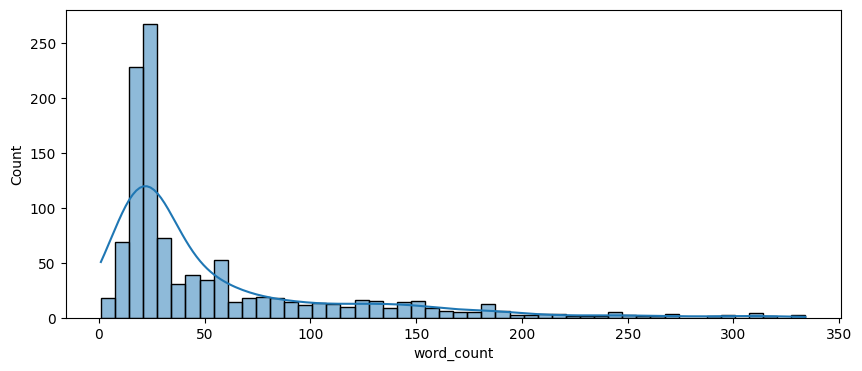

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.histplot(df["word_count"], bins=50, kde=True)
plt.show()

In [124]:
df.loc[df["word_count"] < 10]

,id,company_description,source,is_edited,created_at,char_count,word_count
9,103968,Click here to learn more about GTreasury's partnerships.,website,0.0,2023-06-25 08:46:13,56,8
11,863604,Machine Learning Solutions for Advertising,website,0.0,2024-11-12 09:17:36,42,5
46,672226,"皮卡智能利用人工智能和计算机视觉的力量,提供各种各样的产品,使您的生活更容易,工作更富有成效.无论是视频剪辑,ps抠图,图片去水印,照片动漫,视频抠图等,我们都能满足您的需求.让我们一起让人类变得更聪明!",website,0.0,2023-12-16 03:09:07,102,1
111,557469,"MRN Diagnostics\ Medical Research Networx, LLC",LinkedIn - Reported,0.0,2023-10-31 17:04:58,46,6
120,11348,Global leader in Project Management and Construction services.,website,0.0,2023-03-31 04:53:47,62,8
157,361246,Pagina ufficiale del Pordenone Calcio.,LinkedIn - Reported,0.0,2023-08-05 02:53:29,38,5
262,695017,"Serving your HVAC, Fabrication, Electrical, and Controls Systems needs.",LinkedIn - Reported,0.0,2024-01-24 16:31:10,71,9
278,918303,ปั่นสล็อตแบบไม่มีขั้นต่ำ และแจ็คพ็อตแตกหนักๆกับ สล็อตเว็บตรง กันได้แล้วที่นี่ ต้องบอกเลยว่าเว็บไซต์ FAFA168 ของทางเรานั้นมีระบบการฝากถอน,website,0.0,2025-02-05 21:01:32,136,7
292,481178,Megawatt S.p.A - distribuzione materiale elettrico civile ed industriale,website,0.0,2023-10-27 22:47:52,72,9
298,665508,Our Commitment to Sustainable Development,website,0.0,2023-12-12 07:05:06,41,5


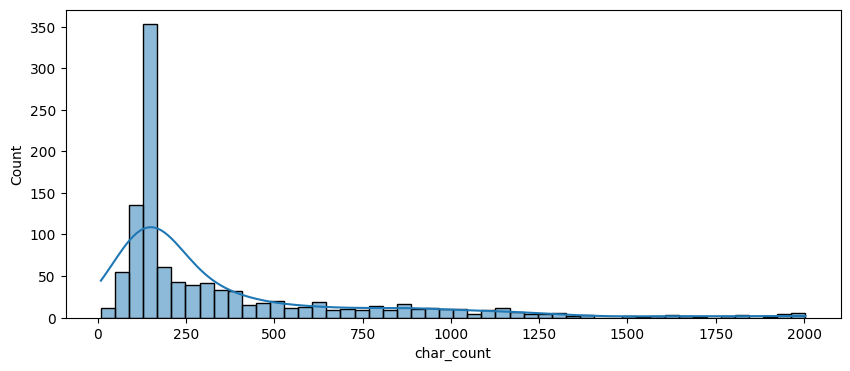

In [125]:
plt.figure(figsize=(10, 4))
sns.histplot(df["char_count"], bins=50, kde=True)
plt.show()

In [126]:
df.loc[df["char_count"] < 40]

,id,company_description,source,is_edited,created_at,char_count,word_count
157,361246,Pagina ufficiale del Pordenone Calcio.,LinkedIn - Reported,0.0,2023-08-05 02:53:29,38,5
443,354387,Precision Polishing & Measuring,LinkedIn - Reported,0.0,2023-08-04 15:30:54,31,4
603,394366,Please view our new website:,LinkedIn - Reported,0.0,2023-08-06 11:19:56,28,5
645,360306,More than 30 years of experience!,LinkedIn - Reported,0.0,2023-08-05 02:00:06,33,6
1063,389001,Ark Group,LinkedIn - Reported,0.0,2023-08-06 06:38:58,9,2


In [127]:
def ascii_ratio(text):
    ascii_count = sum(1 for c in text if ord(c) < 128)
    text_length = len(text)
    if text_length == 0:
        return 0
    else:
        return ascii_count / text_length

def symbol_ratio(text):
    symbol_count = sum(1 for c in text if not c.isalnum() and not c.isspace())
    text_length = len(text)
    if text_length == 0:
        return 0
    else:
        return symbol_count / text_length

def digit_ratio(text):
    digit_count = sum(1 for c in text if c.isdigit())
    text_length = len(text)
    if text_length == 0:
        return 0
    else:
        return digit_count / text_length

In [128]:
df["ascii_ratio"] = df["company_description"].astype(str).apply(ascii_ratio)
df["symbol_ratio"] = df["company_description"].astype(str).apply(symbol_ratio)
df["digit_ratio"] = df["company_description"].astype(str).apply(digit_ratio)

<Axes: xlabel='ascii_ratio', ylabel='Count'>

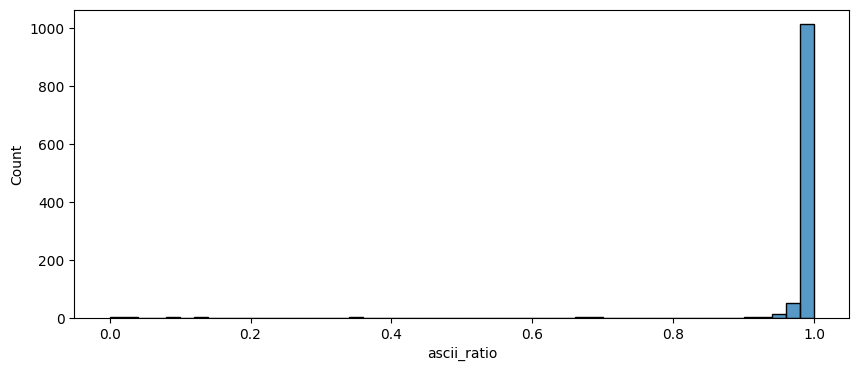

In [129]:
plt.figure(figsize=(10, 4))
sns.histplot(df["ascii_ratio"], bins=50)

In [130]:
pd.set_option('display.max_colwidth', None)
df.loc[df["ascii_ratio"] < 0.6]["company_description"]

46                                                        皮卡智能利用人工智能和计算机视觉的力量,提供各种各样的产品,使您的生活更容易,工作更富有成效.无论是视频剪辑,ps抠图,图片去水印,照片动漫,视频抠图等,我们都能满足您的需求.让我们一起让人类变得更聪明!
278                     ปั่นสล็อตแบบไม่มีขั้นต่ำ และแจ็คพ็อตแตกหนักๆกับ สล็อตเว็บตรง กันได้แล้วที่นี่ ต้องบอกเลยว่าเว็บไซต์ FAFA168 ของทางเรานั้นมีระบบการฝากถอน
689    Στην Coffee Island στόχος μας είναι να εκπαιδεύσουμε επαγγελματίες baristi, με τους οποίους μοιραζόμαστε το ίδιο πάθος για τον ποιοτικό (specialty) καφέ.
809                                              日本人女優の無修正VRエロ動画を見るなら海外サイト一択です。安全に入会、退会できるの？英語が苦手だけど大丈夫？ウィルスや詐欺の心配は？VRエロ動画の視聴って難しい？さまざまな検証を行い目的にあったお勧めサイトを紹介します。
825                                                                        欧时网言论，欧时网欧洲，欧时网法国，欧时网欧中，欧时网深度，欧时网侨界，欧时网视频，欧时网中国，欧时网国际，欧时网文化活动，欧时网全欧留学，欧时网华文教育，欧时网旅行社。
Name: company_description, dtype: object

<Axes: xlabel='symbol_ratio', ylabel='Count'>

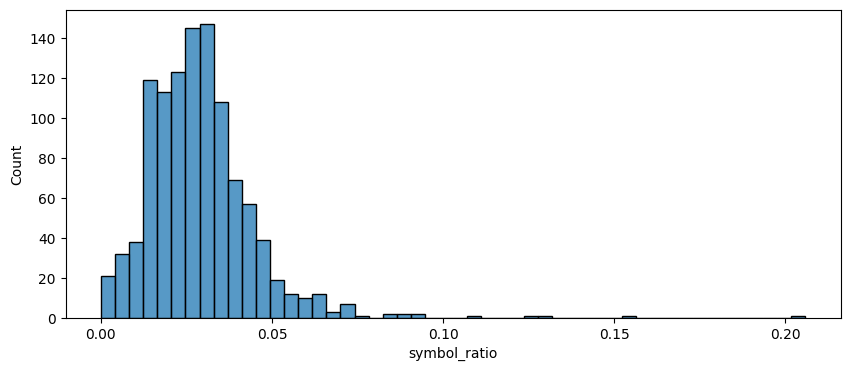

In [131]:
plt.figure(figsize=(10, 4))
sns.histplot(df["symbol_ratio"], bins=50)

In [132]:
df.loc[df["symbol_ratio"] > 0.15]

,id,company_description,source,is_edited,created_at,char_count,word_count,ascii_ratio,symbol_ratio,digit_ratio
278,918303,ปั่นสล็อตแบบไม่มีขั้นต่ำ และแจ็คพ็อตแตกหนักๆกับ สล็อตเว็บตรง กันได้แล้วที่นี่ ต้องบอกเลยว่าเว็บไซต์ FAFA168 ของทางเรานั้นมีระบบการฝากถอน,website,0.0,2025-02-05 21:01:32,136,7,0.095588,0.205882,0.022059
825,504600,欧时网言论，欧时网欧洲，欧时网法国，欧时网欧中，欧时网深度，欧时网侨界，欧时网视频，欧时网中国，欧时网国际，欧时网文化活动，欧时网全欧留学，欧时网华文教育，欧时网旅行社。,website,0.0,2023-10-29 18:00:43,85,1,0.000000,0.152941,0.000000


In [133]:
df.loc[df["symbol_ratio"] > 0.1].iloc[-1]["company_description"]

'Connecting innovators with expertise and capital 0 0 1 22 127 AKQA 1 1 148 \n14.0 Normal 0 false false false EN-US JA X-NONE /* Style Definitions */ \ntable.MsoNormalTable {mso-style-name:Table Normal";  nan nan nan nan nan nan nan nan nan nan nan nan nan 2024-04-03 23:17:09 mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes;  mso-style-priority:99; mso-style-parent:""; mso-padding-alt:0in 5.4pt 0in  5.4pt; mso-para-margin:0in; mso-para-margin-bottom:.0001pt;  line-height:115%; mso-pagination:widow-orphan; font-size:11.0pt;  font-family:Arial; color:black;} 0 0 1 24 143 AKQA 1 1 166 14.0 Normal 0  false false false EN-US JA X-NONE /* Style Definitions */  table.MsoNormalTable {mso-style-name:"Table Normal";  mso-tstyle-rowband-size:0; mso-tstyle-colband-size:0; mso-style-noshow:yes;  mso-style-priority:99; mso-style-parent:""; mso-padding-alt:0in 5.4pt 0in  5.4pt; mso-para-margin:0in; mso-para-margin-bottom:.0001pt;  line-height:115%; mso-pagination:widow-orpha

<Axes: xlabel='digit_ratio', ylabel='Count'>

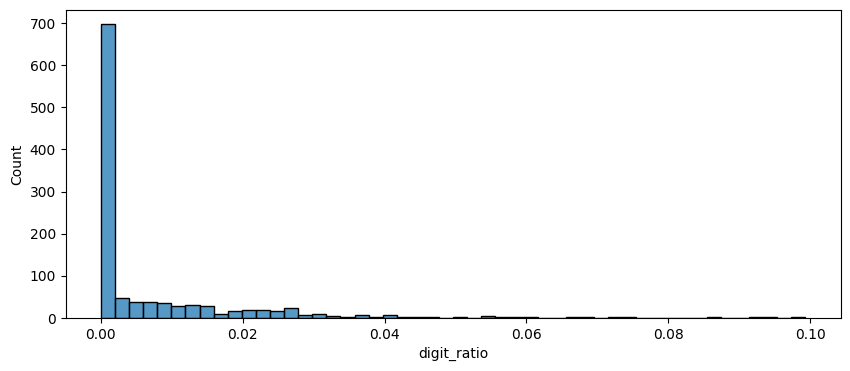

In [134]:
plt.figure(figsize=(10, 4))
sns.histplot(df["digit_ratio"], bins=50)

In [135]:
df.loc[df["digit_ratio"] > 0.08]

,id,company_description,source,is_edited,created_at,char_count,word_count,ascii_ratio,symbol_ratio,digit_ratio
57,116026,Our team at GAME Engineering have over 25 years experience within turnkey design & plant solutions. Our Experience Is Your Guarantee. +44(0)1522 868021,website,0.0,2023-06-27 07:51:54,151,23,1.000000,0.039735,0.099338
195,452241,Home - Back to Health Physical Therapy Associates - conveniently located for River Edge call (201) 833-0234,website,0.0,2023-10-25 22:19:43,107,17,1.000000,0.046729,0.093458
485,560050,THAT'S US! Quality by tradition - Founded in 1941 and located in Fürth - Stadeln since 1952. We are about 100 employees.,website,0.0,2023-10-31 18:56:23,120,22,0.991667,0.050000,0.091667
712,402527,Managed IT Support and Consultancy run from Cardiff Bay. Call us now to discuss IT solutions for your Business - 0333 014 4544,website,0.0,2023-09-25 14:13:31,126,23,1.000000,0.015873,0.087302


In [136]:
df.loc[df["digit_ratio"] > 0.08].iloc[0]["company_description"]

'Our team at GAME Engineering have over 25 years experience within turnkey design & plant solutions. Our Experience Is Your Guarantee. +44(0)1522 868021'

In [ ]:
from langdetect import detect_langs

def detect_lang(text):
    try:
        if len(text.strip()) < 20:
            return "short"
        langs = detect_langs(text)
        top = langs[0]
        if top.lang == "en" and top.prob > 0.80:
            return "en"
        elif top.prob > 0.80:
            return top.lang
        else:
            return "uncertain"
    except:
        return "error"

In [138]:
df["language"] = df["company_description"].astype(str).apply(detect_lang)
df["language"].value_counts()

language
en           937
fr            46
de            39
it            14
nl            10
es            10
sv             7
uncertain      7
no             4
fi             3
pt             2
th             1
ko             1
el             1
da             1
ja             1
zh-cn          1
short          1
Name: count, dtype: int64

In [139]:
df.loc[df["language"] == "short"]

,id,company_description,source,is_edited,created_at,char_count,word_count,ascii_ratio,symbol_ratio,digit_ratio,language
1063,389001,Ark Group,LinkedIn - Reported,0.0,2023-08-06 06:38:58,9,2,1.0,0.0,0.0,short


In [140]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(ngram_range=(1, 2), stop_words="english", max_features=20)
X = vect.fit_transform(df["company_description"].dropna())
ngrams = pd.DataFrame(X.toarray(), columns=vect.get_feature_names_out()).sum().sort_values(ascending=False)

In [141]:
ngrams

solutions      276
business       227
services       191
company        182
data           173
digital        157
und            153
technology     147
et             146
clients        142
service        133
team           122
products       120
en             120
software       115
marketing      115
management     113
companies      111
development    109
world          109
dtype: int64

Some conclusions:
- Going to drop all rows that aren't English (Feature engineering techniques are tuned for English. Multi-lingual support doesn't seem ideal for this test)
- Drop all rows with ascii_ratio < 0.6 (All examples look poor, and ascii will be stripped so those with useful english can be kept)
- Drop all rows with symbol ratio > 0.15 (Examples + fairly standard)
- Don't do any dropping based on digit ratio (All are just because of phone numbers, which will be stripped ideally anyway)
- Drop word_count < 10 or char_count < 40 (Just generally lack signal, and improve the data overall - with more time maybe we keep but flag the ones holding some useful info)

So bringing that all together:

In [142]:
def initial_ingest():
    '''
    Ingest the data from the CSV file and clean it up a bit.
    '''
    df = pd.read_csv("../data/2025_data_to_explore.csv", engine="python", encoding="utf-8")

    # Sort issues with separators in the company description
    df["company_description"] = df["company_description"].apply(clean_text)

    # Drop the unnamed column
    df.drop(columns=["Unnamed: 0"], inplace=True)
    
    # Fix the issue with the broken description for company id 756111
    df = fix_756111_issue(df)

    # Force correct types
    df["company_description"] = df["company_description"].astype(str)
    df["source"] = df["source"].astype(str)
    df["is_edited"] = df["is_edited"].astype(int)
    df["created_at"] = pd.to_datetime(df["created_at"], errors="coerce")
    df["id"] = df["id"].astype(int)

    return df

def initial_quality_filter(df):
    '''
    Perform initial cleanup on the DataFrame based on text quality and duplicates/missing values.
    '''
    # Generate additional features for initial filtering
    df["char_count"] = df["company_description"].apply(len).astype(int)
    df["word_count"] = df["company_description"].apply(lambda x: len(x.split())).astype(int)
    df["ascii_ratio"] = df["company_description"].apply(ascii_ratio).astype(float)
    df["symbol_ratio"] = df["company_description"].apply(symbol_ratio).astype(float)
    df["digit_ratio"] = df["company_description"].apply(digit_ratio).astype(float)
    df["language"] = df["company_description"].apply(detect_lang).astype(str)

    # Filter rows based on above thresholds
    df = df[(df["char_count"] >= 40) & (df["word_count"] >= 10) & (df["ascii_ratio"] >= 0.6) & (df["symbol_ratio"] <= 0.15)]
    df = df[df["language"] == "en"]

    # Clean up source column values to website & linkedin
    df["source"] = df["source"].apply(lambda x: "linkedin" if x == "LinkedIn - Reported" else "website")

    # Reset index and clean up
    df.reset_index(drop=True, inplace=True)
    df.drop(columns=["language"], inplace=True)

    # Drop any duplicate rows based on the 'id' column
    df.drop_duplicates(subset=["id"], inplace=True)
    
    # Drop any rows with null value in 'company_description'
    df.dropna(subset=["company_description"], inplace=True)

    return df

In [143]:
raw_df = initial_ingest()
print(raw_df.shape)
raw_sample = raw_df.sample(10)
raw_sample

(1086, 5)


,id,company_description,source,is_edited,created_at
817,651447,Alternative Data for Hedge Funds and Mutual Funds,website,0,2023-12-05 22:54:26
171,766158,ClearVision Equity is a San Diego based Venture Capital company,website,0,2024-04-04 03:38:44
93,523966,"Celebrating 50 years of experience and service in commercial Printing, Cereus Graphics holds a competitive edge in offering high-quality, reliable, and affordable offset and digital printing services, packaging solutions, mailing services as well as integrated marketing solutions.\ Our approach is strategic, customized, and designed for maximum effectiveness. As a partner in your company's long-term success and a member of your marketing communications team, we look forward to developing solutions that meet your needs and accomplish your goals. We help your ideas take shape reliably, consistently, and affordably.",LinkedIn - Reported,0,2023-10-30 17:49:32
384,858786,"Open-Prod est éditeur et intégrateur d'ERP pour l'industrie. Nos 3 agences à Grenoble, Nantes et Paris nous permettent d'intervenir sur tout le territoire.",website,0,2024-11-06 11:01:39
182,390445,To give two million young people the tools they need to 'make it' in work,LinkedIn - Reported,0,2023-08-06 07:54:24
456,376279,"Market leader in footcare in France, Italy, Germany, U.K. and Australia.",LinkedIn - Reported,0,2023-08-05 18:20:47
864,518110,"Rettifica Meccanica offers a complete service of consultancy, optimization and manufacture of components for Oil & Gas valves, with in-house mechanical workshop.",website,0,2023-10-30 13:52:51
538,541281,"Recruitics is a data-powered recruitment marketing agency with a platform, iON, that makes it easy for the world’s leading brands to attract and hire great talent.\ \ As the industry-leading provider of talent attraction solutions for the Fortune 1000, Recruitics employs a team of highly skilled and passionate recruitment marketers who leverage the company's award-winning technology to ensure world-class results for their clients.\ \ Home to both the largest programmatic job advertising team in the world and some of the industry's brightest creative minds, the Recruitics approach to recruitment marketing is one that is driven by data and powered by people, marrying strategy, creativity, and technology to solve today’s toughest talent acquisition challenges.\ \ Recruitics offers solutions for candidate targeting and acquisition, applicant nurturing and engagement, employer branding, career sites, programmatic advertising, data optimization, and more! Visit their website www.recruitics.com or email their team at info@recruitics.com.",LinkedIn - Reported,0,2023-10-31 05:43:51
731,868558,"PhenixID brings you robust identity management products paired with top-notch customer service, delivering solutions for a more secure digital landscape.",website,0,2024-11-16 12:11:34
386,813186,Values-based investing for Canadians since 1992Learn MoreImpact Equity Fundwith 10 year track recordLearn MoreQuantitative modelingdrives performanceLearn,website,0,2024-09-30 13:36:35


In [144]:
cleaned_df = initial_quality_filter(raw_df)
print(cleaned_df.shape)
cleaned_df.loc[cleaned_df["id"].isin(raw_sample["id"])]

(912, 10)


,id,company_description,source,is_edited,created_at,char_count,word_count,ascii_ratio,symbol_ratio,digit_ratio
75,523966,"Celebrating 50 years of experience and service in commercial Printing, Cereus Graphics holds a competitive edge in offering high-quality, reliable, and affordable offset and digital printing services, packaging solutions, mailing services as well as integrated marketing solutions.\ Our approach is strategic, customized, and designed for maximum effectiveness. As a partner in your company's long-term success and a member of your marketing communications team, we look forward to developing solutions that meet your needs and accomplish your goals. We help your ideas take shape reliably, consistently, and affordably.",linkedin,0,2023-10-30 17:49:32,620,87,1.000000,0.029032,0.003226
138,766158,ClearVision Equity is a San Diego based Venture Capital company,website,0,2024-04-04 03:38:44,63,10,1.000000,0.000000,0.000000
148,390445,To give two million young people the tools they need to 'make it' in work,linkedin,0,2023-08-06 07:54:24,73,15,1.000000,0.027397,0.000000
321,813186,Values-based investing for Canadians since 1992Learn MoreImpact Equity Fundwith 10 year track recordLearn MoreQuantitative modelingdrives performanceLearn,website,0,2024-09-30 13:36:35,154,16,1.000000,0.006494,0.038961
376,376279,"Market leader in footcare in France, Italy, Germany, U.K. and Australia.",linkedin,0,2023-08-05 18:20:47,72,11,1.000000,0.083333,0.000000
444,541281,"Recruitics is a data-powered recruitment marketing agency with a platform, iON, that makes it easy for the world’s leading brands to attract and hire great talent.\ \ As the industry-leading provider of talent attraction solutions for the Fortune 1000, Recruitics employs a team of highly skilled and passionate recruitment marketers who leverage the company's award-winning technology to ensure world-class results for their clients.\ \ Home to both the largest programmatic job advertising team in the world and some of the industry's brightest creative minds, the Recruitics approach to recruitment marketing is one that is driven by data and powered by people, marrying strategy, creativity, and technology to solve today’s toughest talent acquisition challenges.\ \ Recruitics offers solutions for candidate targeting and acquisition, applicant nurturing and engagement, employer branding, career sites, programmatic advertising, data optimization, and more! Visit their website www.recruitics.com or email their team at info@recruitics.com.",linkedin,0,2023-10-31 05:43:51,1046,146,0.998088,0.034417,0.003824
604,868558,"PhenixID brings you robust identity management products paired with top-notch customer service, delivering solutions for a more secure digital landscape.",website,0,2024-11-16 12:11:34,153,20,1.000000,0.019608,0.000000
724,518110,"Rettifica Meccanica offers a complete service of consultancy, optimization and manufacture of components for Oil & Gas valves, with in-house mechanical workshop.",website,0,2023-10-30 13:52:51,161,22,1.000000,0.031056,0.000000
